In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RDF/RInterface.hxx"
#include "TFile.h"
#include "TTree.h"
#include "TMath.h"
#include <vector>
using namespace ROOT; // RDataFrame lives in here
using namespace std;
ROOT::EnableImplicitMT();

In [2]:
ROOT::RDataFrame R2_0to10("resultsTree","/home/tmengel/jetbackgroundML/jet-background-subtraction/src/results/results_unifrom_split_R02_0to10.root", {"NeuralNetworkBased","AreaBased","MultiplicityBased","pythiapt","rawjetpt","weights"});
ROOT::RDataFrame R4_0to10("resultsTree","/home/tmengel/jetbackgroundML/jet-background-subtraction/src/results/results_unifrom_split_R04_0to10.root", {"NeuralNetworkBased","AreaBased","MultiplicityBased","pythiapt","rawjetpt","weights"});
ROOT::RDataFrame R2_20to40("resultsTree","/home/tmengel/jetbackgroundML/jet-background-subtraction/src/results/results_unifrom_split_R02_20to40.root", {"NeuralNetworkBased","AreaBased","MultiplicityBased","pythiapt","rawjetpt","weights"});
ROOT::RDataFrame R4_20to40("resultsTree","/home/tmengel/jetbackgroundML/jet-background-subtraction/src/results/results_unifrom_split_R04_20to40.root", {"NeuralNetworkBased","AreaBased","MultiplicityBased","pythiapt","rawjetpt","weights"});

# Definitions for Target = $p_{t}^{pythia}$

In [30]:
auto R2_0to10_res = R2_0to10.Define("AreaBasedRes","pythiapt - AreaBased")
                            .Define("MultiplicityBasedRes", "pythiapt - MultiplicityBased")
                            .Define("NeuralNetworkBasedResidual", "pythiapt-NeuralNetworkBased");

auto R2_20to40_res = R2_20to40.Define("AreaBasedRes","pythiapt-AreaBased")
                            .Define("MultiplicityBasedRes", "pythiapt - MultiplicityBased")
                            .Define("NeuralNetworkBasedResidual", "pythiapt-NeuralNetworkBased");

auto R4_0to10_res = R4_0to10.Define("AreaBasedRes","pythiapt-AreaBased")
                            .Define("MultiplicityBasedRes", "pythiapt - MultiplicityBased")
                            .Define("NeuralNetworkBasedResidual", "pythiapt-NeuralNetworkBased");
                        
auto R4_20to40_res = R4_20to40.Define("AreaBasedRes","pythiapt-AreaBased")
                            .Define("MultiplicityBasedRes", "pythiapt - MultiplicityBased")
                            .Define("NeuralNetworkBasedResidual", "pythiapt-NeuralNetworkBased");

# Definitions for Target = $\frac{p_{t}^{pythia}}{p_{t}^{raw}}$

In [31]:
// auto R2_0to10_res = R2_0to10.Define("AreaBasedRes","(pythiapt*rawjetpt)-AreaBased")
//                             .Define("MultiplicityBasedRes", "(pythiapt*rawjetpt) - MultiplicityBased")
//                             .Define("NeuralNetworkBasedResidual", "(pythiapt*rawjetpt)-(NeuralNetworkBased*rawjetpt)");

// auto R2_20to40_res = R2_20to40.Define("AreaBasedRes","(pythiapt*rawjetpt)-AreaBased")
//                             .Define("MultiplicityBasedRes", "(pythiapt*rawjetpt) - MultiplicityBased")
//                             .Define("NeuralNetworkBasedResidual", "(pythiapt*rawjetpt)-(NeuralNetworkBased*rawjetpt)");

// auto R4_0to10_res = R4_0to10.Define("AreaBasedRes","(pythiapt*rawjetpt)-AreaBased")
//                             .Define("MultiplicityBasedRes", "(pythiapt*rawjetpt) - MultiplicityBased")
//                             .Define("NeuralNetworkBasedResidual", "(pythiapt*rawjetpt)-(NeuralNetworkBased*rawjetpt)");
                        
// auto R4_20to40_res = R4_20to40.Define("AreaBasedRes","(pythiapt*rawjetpt)-AreaBased")
//                             .Define("MultiplicityBasedRes", "(pythiapt*rawjetpt) - MultiplicityBased")
//                             .Define("NeuralNetworkBasedResidual", "(pythiapt*rawjetpt)-(NeuralNetworkBased*rawjetpt)");

# Define Histograms and thier axis titles

In [32]:
auto R2_0to10_AreaRes = R2_0to10_res.Fill<Float_t, Float_t, Float_t>(TH2D("R2_0to10_AreaRes", "Residuals from Area-Based subtraction for 0-10% central R = 0.2", 100, -50,  50, 100,10,110), { "AreaBasedRes","rawjetpt","weights"});
auto R2_0to10_MultiplicityRes = R2_0to10_res.Fill<Float_t, Float_t, Float_t>(TH2D("R2_0to10_MultiplicityRes", "Residuals from Multiplicity-Based subtraction for 0-10% central R = 0.2",100, -50,  50, 100,10,110), {"MultiplicityBasedRes" , "rawjetpt","weights"});
auto R2_0to10_NeuralNetworkRes = R2_0to10_res.Fill<Float_t, Float_t, Float_t>(TH2D("R2_0to10_NeuralNetworkRes", "Residuals from Neural Network-Based subtraction for 0-10% central R = 0.2", 100, -50,  50, 100,10,110), {"NeuralNetworkBasedResidual","rawjetpt","weights"});

auto R2_20to40_AreaRes = R2_20to40_res.Fill<Float_t, Float_t, Float_t>(TH2D("R2_20to40_AreaRes", "Residuals from Area-Based subtraction for 20-40% central R = 0.2", 100, -50,  50, 100,10,110), { "AreaBasedRes","rawjetpt","weights"});
auto R2_20to40_MultiplicityRes = R2_20to40_res.Fill<Float_t, Float_t, Float_t>(TH2D("R2_20to40_MultiplicityRes", "Residuals from Multiplicity-Based subtraction for 20-40% central R = 0.2", 100, -50,  50, 100,10,110), {"MultiplicityBasedRes" , "rawjetpt","weights"});
auto R2_20to40_NeuralNetworkRes = R2_20to40_res.Fill<Float_t, Float_t, Float_t>(TH2D("R2_20to40_NeuralNetworkRes", "Residuals from Neural Network-Based subtraction for 20-40% central R = 0.2", 100, -50,  50, 100,10,110), {"NeuralNetworkBasedResidual","rawjetpt","weights"});

auto R4_0to10_AreaRes = R4_0to10_res.Fill<Float_t, Float_t, Float_t>(TH2D("R4_0to10_AreaRes", "Residuals from Area-Based subtraction for 0-10% central R = 0.4", 100, -50,  50, 100,10,110), { "AreaBasedRes","rawjetpt","weights"});
auto R4_0to10_MultiplicityRes = R4_0to10_res.Fill<Float_t, Float_t, Float_t>(TH2D("R4_0to10_MultiplicityRes", "Residuals from Multiplicity-Based subtraction for 0-10% central R = 0.4",  100, -50,  50, 100,10,110), {"MultiplicityBasedRes" , "rawjetpt","weights"});
auto R4_0to10_NeuralNetworkRes = R4_0to10_res.Fill<Float_t, Float_t, Float_t>(TH2D("R4_0to10_NeuralNetworkRes", "Residuals from Neural Network-Based subtraction for 0-10% central R = 0.4",  100, -50,  50, 100,10,110), {"NeuralNetworkBasedResidual","rawjetpt","weights"});

auto R4_20to40_AreaRes = R4_20to40_res.Fill<Float_t, Float_t, Float_t>(TH2D("R4_20to40_AreaRes", "Residuals from Area-Based subtraction for 20-40% central R = 0.4", 100, -50,  50, 100,10,110), { "AreaBasedRes","rawjetpt","weights"});
auto R4_20to40_MultiplicityRes = R4_20to40_res.Fill<Float_t, Float_t, Float_t>(TH2D("R4_20to40_MultiplicityRes", "Residuals from Multiplicity-Based subtraction for 20-40% central R = 0.4",100, -50,  50, 100,10,110), {"MultiplicityBasedRes" , "rawjetpt","weights"});
auto R4_20to40_NeuralNetworkRes = R4_20to40_res.Fill<Float_t, Float_t, Float_t>(TH2D("R4_20to40_NeuralNetworkRes", "Residuals from Neural Network-Based subtraction for 20-40% central R = 0.4", 100, -50,  50, 100,10,110), {"NeuralNetworkBasedResidual","rawjetpt","weights"});

// R = 0.2 Axis titles 
R2_0to10_AreaRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R2_0to10_MultiplicityRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R2_0to10_NeuralNetworkRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R2_0to10_AreaRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");
R2_0to10_MultiplicityRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");
R2_0to10_NeuralNetworkRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");

R2_20to40_AreaRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R2_20to40_MultiplicityRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R2_20to40_NeuralNetworkRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R2_20to40_AreaRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");
R2_20to40_MultiplicityRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");
R2_20to40_NeuralNetworkRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");

// R = 0.4 Axis titles 
R4_0to10_AreaRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R4_0to10_MultiplicityRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R4_0to10_NeuralNetworkRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R4_0to10_AreaRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");
R4_0to10_MultiplicityRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");
R4_0to10_NeuralNetworkRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");

R4_20to40_AreaRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R4_20to40_MultiplicityRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R4_20to40_NeuralNetworkRes->GetXaxis()->SetTitle("p_{t}^{pythia} - p_{t}^{prediction} [GeV/c]");
R4_20to40_AreaRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");
R4_20to40_MultiplicityRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");
R4_20to40_NeuralNetworkRes->GetYaxis()->SetTitle("p_{t}^{Jet} [GeV/c]");

Warning in <TROOT::Append>: Replacing existing TH1: R2_0to10_AreaRes (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: R2_0to10_MultiplicityRes (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: R2_0to10_NeuralNetworkRes (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: R2_20to40_AreaRes (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: R2_20to40_MultiplicityRes (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: R2_20to40_NeuralNetworkRes (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: R4_0to10_AreaRes (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: R4_0to10_MultiplicityRes (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: R4_0to10_NeuralNetworkRes (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: R4_20to40_AreaRes (Potential memory leak).
Warni

# Normalize Residuals

In [33]:
Float_t norm;
for(Int_t ny = 0; ny < R2_0to10_AreaRes->GetNbinsY()+1; ny++){
    norm = R2_0to10_AreaRes->Integral(1,R2_0to10_AreaRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R2_0to10_AreaRes->SetBinContent(nx,ny,R2_0to10_AreaRes->GetBinContent(nx,ny)/norm);
      R2_0to10_AreaRes->SetBinError(nx,ny,R2_0to10_AreaRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R2_0to10_MultiplicityRes->GetNbinsY()+1; ny++){
    norm = R2_0to10_MultiplicityRes->Integral(1,R2_0to10_MultiplicityRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R2_0to10_MultiplicityRes->SetBinContent(nx,ny,R2_0to10_MultiplicityRes->GetBinContent(nx,ny)/norm);
      R2_0to10_MultiplicityRes->SetBinError(nx,ny,R2_0to10_MultiplicityRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R2_0to10_NeuralNetworkRes->GetNbinsY()+1; ny++){
    norm = R2_0to10_NeuralNetworkRes->Integral(1,R2_0to10_NeuralNetworkRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R2_0to10_NeuralNetworkRes->SetBinContent(nx,ny,R2_0to10_NeuralNetworkRes->GetBinContent(nx,ny)/norm);
      R2_0to10_NeuralNetworkRes->SetBinError(nx,ny,R2_0to10_NeuralNetworkRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R4_0to10_AreaRes->GetNbinsY()+1; ny++){
    norm = R4_0to10_AreaRes->Integral(1,R4_0to10_AreaRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R4_0to10_AreaRes->SetBinContent(nx,ny,R4_0to10_AreaRes->GetBinContent(nx,ny)/norm);
      R4_0to10_AreaRes->SetBinError(nx,ny,R4_0to10_AreaRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R4_0to10_MultiplicityRes->GetNbinsY()+1; ny++){
    norm = R4_0to10_MultiplicityRes->Integral(1,R4_0to10_MultiplicityRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R4_0to10_MultiplicityRes->SetBinContent(nx,ny,R4_0to10_MultiplicityRes->GetBinContent(nx,ny)/norm);
      R4_0to10_MultiplicityRes->SetBinError(nx,ny,R4_0to10_MultiplicityRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R4_0to10_NeuralNetworkRes->GetNbinsY()+1; ny++){
    norm = R4_0to10_NeuralNetworkRes->Integral(1,R4_0to10_NeuralNetworkRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R4_0to10_NeuralNetworkRes->SetBinContent(nx,ny,R4_0to10_NeuralNetworkRes->GetBinContent(nx,ny)/norm);
      R4_0to10_NeuralNetworkRes->SetBinError(nx,ny,R4_0to10_NeuralNetworkRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R2_20to40_AreaRes->GetNbinsY()+1; ny++){
    norm = R2_20to40_AreaRes->Integral(1,R2_20to40_AreaRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R2_20to40_AreaRes->SetBinContent(nx,ny,R2_20to40_AreaRes->GetBinContent(nx,ny)/norm);
      R2_20to40_AreaRes->SetBinError(nx,ny,R2_20to40_AreaRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R2_20to40_MultiplicityRes->GetNbinsY()+1; ny++){
    norm = R2_20to40_MultiplicityRes->Integral(1,R2_20to40_MultiplicityRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R2_20to40_MultiplicityRes->SetBinContent(nx,ny,R2_20to40_MultiplicityRes->GetBinContent(nx,ny)/norm);
      R2_20to40_MultiplicityRes->SetBinError(nx,ny,R2_20to40_MultiplicityRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R2_20to40_NeuralNetworkRes->GetNbinsY()+1; ny++){
    norm = R2_20to40_NeuralNetworkRes->Integral(1,R2_20to40_NeuralNetworkRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R2_20to40_NeuralNetworkRes->SetBinContent(nx,ny,R2_20to40_NeuralNetworkRes->GetBinContent(nx,ny)/norm);
      R2_20to40_NeuralNetworkRes->SetBinError(nx,ny,R2_20to40_NeuralNetworkRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R4_20to40_AreaRes->GetNbinsY()+1; ny++){
    norm = R4_20to40_AreaRes->Integral(1,R4_20to40_AreaRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R4_20to40_AreaRes->SetBinContent(nx,ny,R4_20to40_AreaRes->GetBinContent(nx,ny)/norm);
      R4_20to40_AreaRes->SetBinError(nx,ny,R4_20to40_AreaRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R4_20to40_MultiplicityRes->GetNbinsY()+1; ny++){
    norm = R4_20to40_MultiplicityRes->Integral(1,R4_20to40_MultiplicityRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R4_20to40_MultiplicityRes->SetBinContent(nx,ny,R4_20to40_MultiplicityRes->GetBinContent(nx,ny)/norm);
      R4_20to40_MultiplicityRes->SetBinError(nx,ny,R4_20to40_MultiplicityRes->GetBinError(nx,ny)/norm);
    }
}
norm =0;

for(Int_t ny = 0; ny < R4_20to40_NeuralNetworkRes->GetNbinsY()+1; ny++){
    norm = R4_20to40_NeuralNetworkRes->Integral(1,R4_20to40_NeuralNetworkRes->GetNbinsX()+1,ny,ny);
    if( norm ==0 ) continue;
    for(Int_t nx =0; nx< 100; nx++){
      R4_20to40_NeuralNetworkRes->SetBinContent(nx,ny,R4_20to40_NeuralNetworkRes->GetBinContent(nx,ny)/norm);
      R4_20to40_NeuralNetworkRes->SetBinError(nx,ny,R4_20to40_NeuralNetworkRes->GetBinError(nx,ny)/norm);
    }
}

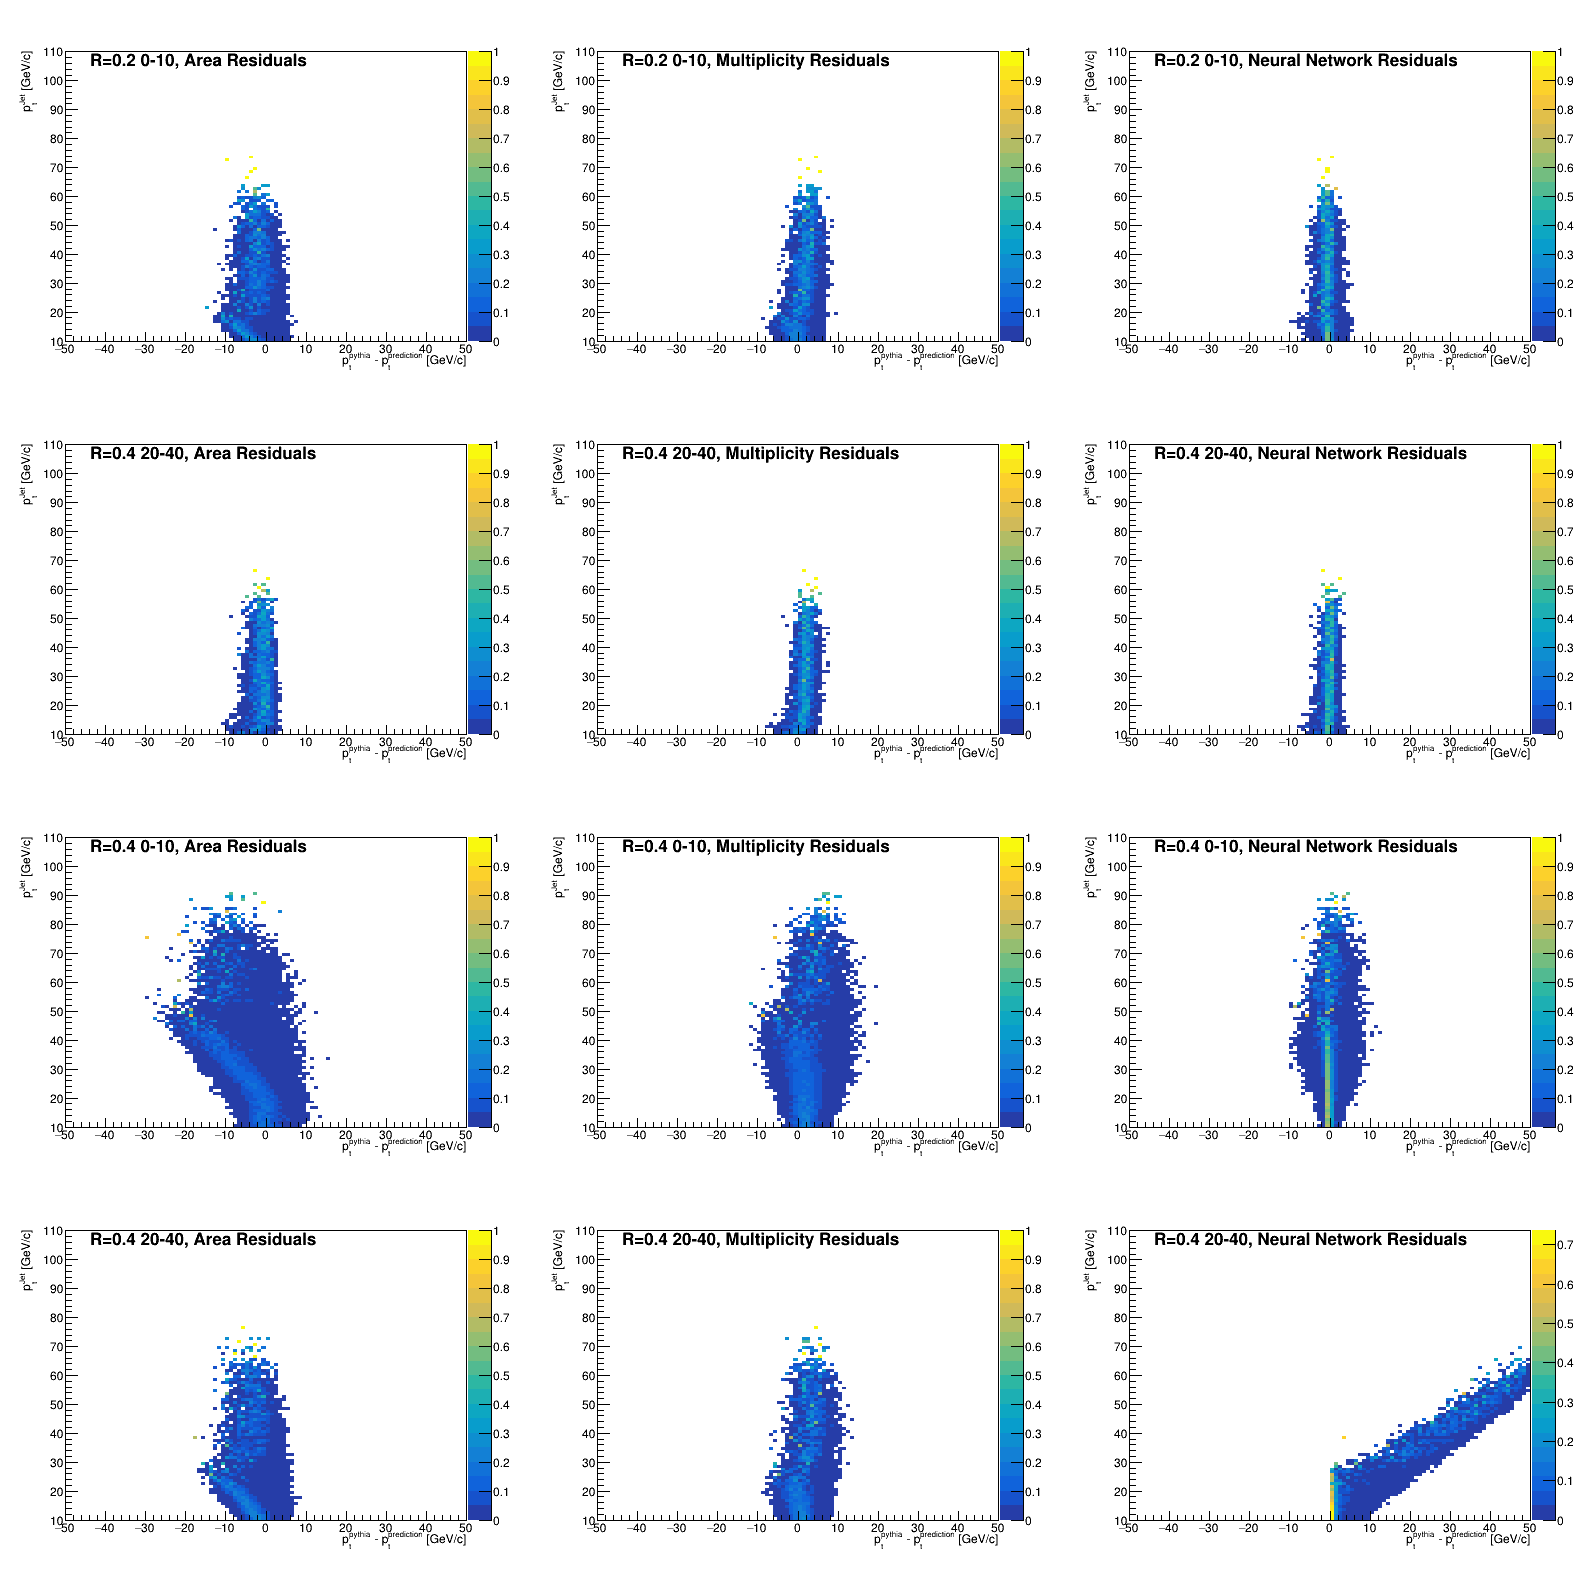

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [35]:
gStyle->SetPalette(kBird);
gStyle->SetOptStat(0);

auto c1 = new TCanvas("c1","c1",1600,1600);
c1->Divide(3,4);
c1->cd(1);
R2_0to10_AreaRes->Draw("colz");
R2_0to10_AreaRes->SetTitle("");
// R2_0to10_AreaRes->GetYaxis()->SetRangeUser(10,80);
// R2_0to10_AreaRes->GetXaxis()->SetRangeUser(-15,15);
TLatex *t1 = new TLatex(0.15,0.86,"R=0.2 0-10, Area Residuals");
t1->SetNDC();

t1->Draw("same");

c1->cd(2);
R2_0to10_MultiplicityRes->Draw("colz");
R2_0to10_MultiplicityRes->SetTitle("");
// R2_0to10_MultiplicityRes->GetYaxis()->SetRangeUser(10,80);
// R2_0to10_MultiplicityRes->GetXaxis()->SetRangeUser(-15,15);
TLatex *t2 = new TLatex(0.15,0.86,"R=0.2 0-10, Multiplicity Residuals");
t2->SetNDC();

t2->Draw("same");

c1->cd(3);
TLatex *t3 = new TLatex(0.15,0.86,"R=0.2 0-10, Neural Network Residuals");
t3->SetNDC();
R2_0to10_NeuralNetworkRes->Draw("colz");
// R2_0to10_NeuralNetworkRes->GetXaxis()->SetRangeUser(-15,15);
// R2_0to10_NeuralNetworkRes->GetYaxis()->SetRangeUser(10,80);
R2_0to10_NeuralNetworkRes->SetTitle("");
t3->Draw("same");

c1->cd(4);
R2_20to40_AreaRes->Draw("colz");
R2_20to40_AreaRes->SetTitle("");
// R2_20to40_AreaRes->GetYaxis()->SetRangeUser(10,80);
// R2_20to40_AreaRes->GetXaxis()->SetRangeUser(-15,15);
TLatex *t4 = new TLatex(0.15,0.86,"R=0.4 20-40, Area Residuals");
t4->SetNDC();
t4->Draw("same");

c1->cd(5);
R2_20to40_MultiplicityRes->Draw("colz");
R2_20to40_MultiplicityRes->SetTitle("");
// R2_20to40_MultiplicityRes->GetYaxis()->SetRangeUser(10,80);
// R2_20to40_MultiplicityRes->GetXaxis()->SetRangeUser(-15,15);
TLatex *t5 = new TLatex(0.15,0.86,"R=0.4 20-40, Multiplicity Residuals");
t5->SetNDC();
t5->Draw("same");

c1->cd(6);
TLatex *t6 = new TLatex(0.15,0.86,"R=0.4 20-40, Neural Network Residuals");
t6->SetNDC();
R2_20to40_NeuralNetworkRes->Draw("colz");
// R2_20to40_NeuralNetworkRes->GetXaxis()->SetRangeUser(-15,15);
// R2_20to40_NeuralNetworkRes->GetYaxis()->SetRangeUser(10,80);
R2_20to40_NeuralNetworkRes->SetTitle("");
t6->Draw("same");

c1->cd(7);
R4_0to10_AreaRes->Draw("colz");
R4_0to10_AreaRes->SetTitle("");
// R4_0to10_AreaRes->GetYaxis()->SetRangeUser(10,80);
// R4_0to10_AreaRes->GetXaxis()->SetRangeUser(-15,15);
TLatex *t7 = new TLatex(0.15,0.86,"R=0.4 0-10, Area Residuals");
t7->SetNDC();
t7->Draw("same");

c1->cd(8);
R4_0to10_MultiplicityRes->Draw("colz");
R4_0to10_MultiplicityRes->SetTitle("");
// R4_0to10_MultiplicityRes->GetYaxis()->SetRangeUser(10,80);
// R4_0to10_MultiplicityRes->GetXaxis()->SetRangeUser(-15,15);
TLatex *t8 = new TLatex(0.15,0.86,"R=0.4 0-10, Multiplicity Residuals");
t8->SetNDC();
t8->Draw("same");

c1->cd(9);
TLatex *t9 = new TLatex(0.15,0.86,"R=0.4 0-10, Neural Network Residuals");
t9->SetNDC();
R4_0to10_NeuralNetworkRes->Draw("colz");
// R4_0to10_NeuralNetworkRes->GetXaxis()->SetRangeUser(-15,15);
// R4_0to10_NeuralNetworkRes->GetYaxis()->SetRangeUser(10,80);
R4_0to10_NeuralNetworkRes->SetTitle("");
t9->Draw("same");

c1->cd(10);
R4_20to40_AreaRes->Draw("colz");
R4_20to40_AreaRes->SetTitle("");
// R4_20to40_AreaRes->GetYaxis()->SetRangeUser(10,80);
// R4_20to40_AreaRes->GetXaxis()->SetRangeUser(-15,15);
TLatex *t10 = new TLatex(0.15,0.86,"R=0.4 20-40, Area Residuals");
t10->SetNDC();
t10->Draw("same");

c1->cd(11);
R4_20to40_MultiplicityRes->Draw("colz");
R4_20to40_MultiplicityRes->SetTitle("");
// R4_20to40_MultiplicityRes->GetYaxis()->SetRangeUser(10,80);
// R4_20to40_MultiplicityRes->GetXaxis()->SetRangeUser(-15,15);
TLatex *t11 = new TLatex(0.15,0.86,"R=0.4 20-40, Multiplicity Residuals");
t11->SetNDC();
t11->Draw("same");

c1->cd(12);
TLatex *t12 = new TLatex(0.15,0.86,"R=0.4 20-40, Neural Network Residuals");
t12->SetNDC();
R4_20to40_NeuralNetworkRes->Draw("colz");
// R4_20to40_NeuralNetworkRes->GetXaxis()->SetRangeUser(-15,15);
// R4_20to40_NeuralNetworkRes->GetYaxis()->SetRangeUser(10,80);
R4_20to40_NeuralNetworkRes->SetTitle("");
t12->Draw("same");



c1->Draw(); 


In [36]:
// Data Set Params
Double_t jetRadiusR02 = 0.2;
Double_t jetRadiusR04 = 0.4;
string centrality1 = "0-10%";
string centrality2 = "20-40%";
TString target = "jetpt_pythia";

Int_t binNumberStart = 5;
Int_t binNumberEnd = 15;
Int_t binNumberStart_high = 45;
Int_t binNumberEnd_high = 55;

TH1D* areaBased_R2_0to10 = R2_0to10_AreaRes->ProjectionX("Area Based R = 0.2 0-10%", binNumberStart, binNumberEnd);
areaBased_R2_0to10->Scale(1./areaBased_R2_0to10->Integral(), "width");
areaBased_R2_0to10->GetYaxis()->SetTitle("Probability Density");
areaBased_R2_0to10->SetLineColor(kRed+1);
areaBased_R2_0to10->SetMarkerStyle(33);
areaBased_R2_0to10->SetMarkerColor(kRed+1);
areaBased_R2_0to10->SetMarkerSize(2);

TH1D* multiplicityBased_R2_0to10 = R2_0to10_MultiplicityRes->ProjectionX("Multiplicity Based R = 0.2 0-10%", binNumberStart, binNumberEnd);
multiplicityBased_R2_0to10->Scale(1./multiplicityBased_R2_0to10->Integral(), "width");
multiplicityBased_R2_0to10->SetLineColor(kAzure-2);
multiplicityBased_R2_0to10->SetMarkerColor(kAzure-2);
multiplicityBased_R2_0to10->SetMarkerStyle(34);
multiplicityBased_R2_0to10->SetMarkerSize(2);

TH1D* neuralNetwork_R2_0to10 = R2_0to10_NeuralNetworkRes->ProjectionX("Neural Network R = 0.2 0-10%" , binNumberStart, binNumberEnd);
neuralNetwork_R2_0to10->Scale(1./neuralNetwork_R2_0to10->Integral(), "width");
neuralNetwork_R2_0to10->GetYaxis()->SetTitle("Probability Density");
neuralNetwork_R2_0to10->GetYaxis()->SetTitleSize(0.055);
neuralNetwork_R2_0to10->GetYaxis()->SetTitleOffset(0.95);
neuralNetwork_R2_0to10->SetLineColor(kBlack);
neuralNetwork_R2_0to10->SetMarkerColor(kBlack);
neuralNetwork_R2_0to10->SetMarkerStyle(8);
neuralNetwork_R2_0to10->SetMarkerSize(2);

TH1D* areaBasedhigh_R2_0to10 = R2_0to10_AreaRes->ProjectionX("Area Based High R = 0.2 0-10%", binNumberStart_high, binNumberEnd_high);
areaBasedhigh_R2_0to10->Scale(1./areaBasedhigh_R2_0to10->Integral(), "width");
areaBasedhigh_R2_0to10->GetYaxis()->SetTitle("Probability Density");
areaBasedhigh_R2_0to10->SetLineColor(kRed+1);
areaBasedhigh_R2_0to10->SetMarkerStyle(33);
areaBasedhigh_R2_0to10->SetMarkerColor(kRed+1);
areaBasedhigh_R2_0to10->SetMarkerSize(2);

TH1D* multiplicityBasedhigh_R2_0to10 = R2_0to10_MultiplicityRes->ProjectionX("Multiplicity Based High R = 0.2 0-10%", binNumberStart_high, binNumberEnd_high);
multiplicityBasedhigh_R2_0to10->Scale(1./multiplicityBasedhigh_R2_0to10->Integral(), "width");
multiplicityBasedhigh_R2_0to10->SetLineColor(kAzure-2);
multiplicityBasedhigh_R2_0to10->SetMarkerColor(kAzure-2);
multiplicityBasedhigh_R2_0to10->SetMarkerStyle(34);
multiplicityBasedhigh_R2_0to10->SetMarkerSize(1.2);
multiplicityBasedhigh_R2_0to10->SetMarkerSize(2);

TH1D* neuralNetworkhigh_R2_0to10 = R2_0to10_NeuralNetworkRes->ProjectionX("Neural Network High R = 0.2 0-10%", binNumberStart_high, binNumberEnd_high);
neuralNetworkhigh_R2_0to10->Scale(1./neuralNetworkhigh_R2_0to10->Integral(), "width");
neuralNetworkhigh_R2_0to10->GetYaxis()->SetTitle("Probability Density");
neuralNetworkhigh_R2_0to10->GetYaxis()->SetTitleSize(0.06);
neuralNetworkhigh_R2_0to10->GetYaxis()->SetTitleOffset(0.8);
neuralNetworkhigh_R2_0to10->GetYaxis()->SetRangeUser(0,0.30);
neuralNetworkhigh_R2_0to10->SetLineColor(kBlack);
neuralNetworkhigh_R2_0to10->SetMarkerColor(kBlack);
neuralNetworkhigh_R2_0to10->SetMarkerStyle(8);
neuralNetworkhigh_R2_0to10->SetMarkerSize(2);

// R = 0.2 20-40 %
TH1D* areaBased_R2_20to40 = R2_20to40_AreaRes->ProjectionX("Area Based R = 0.2 20-40%", binNumberStart, binNumberEnd);
areaBased_R2_20to40->Scale(1./areaBased_R2_20to40->Integral(), "width");
areaBased_R2_20to40->GetYaxis()->SetTitle("Probability Density");
areaBased_R2_20to40->SetLineColor(kRed+1);
areaBased_R2_20to40->SetMarkerStyle(33);
areaBased_R2_20to40->SetMarkerColor(kRed+1);
areaBased_R2_20to40->SetMarkerSize(2);
areaBased_R2_20to40->GetYaxis()->SetTitle("Probability Density");

TH1D* multiplicityBased_R2_20to40 = R2_20to40_MultiplicityRes->ProjectionX("Multiplicity Based  R = 0.2 20-40%", binNumberStart, binNumberEnd);
multiplicityBased_R2_20to40->Scale(1./multiplicityBased_R2_20to40->Integral(), "width");
multiplicityBased_R2_20to40->SetLineColor(kAzure-2);
multiplicityBased_R2_20to40->SetMarkerColor(kAzure-2);
multiplicityBased_R2_20to40->SetMarkerStyle(34);
multiplicityBased_R2_20to40->SetMarkerSize(2);

TH1D* neuralNetwork_R2_20to40 = R2_20to40_NeuralNetworkRes->ProjectionX("Neural Network  R = 0.2 20-40%", binNumberStart, binNumberEnd);
neuralNetwork_R2_20to40->Scale(1./neuralNetwork_R2_20to40->Integral(), "width");
neuralNetwork_R2_20to40->GetYaxis()->SetTitle("Probability Density");
neuralNetwork_R2_20to40->GetYaxis()->SetTitleSize(0.055);
neuralNetwork_R2_20to40->GetYaxis()->SetTitleOffset(0.95);
neuralNetwork_R2_20to40->SetLineColor(kBlack);
neuralNetwork_R2_20to40->SetMarkerColor(kBlack);
neuralNetwork_R2_20to40->SetMarkerStyle(8);
neuralNetwork_R2_20to40->SetMarkerSize(2);

TH1D* areaBasedhigh_R2_20to40 = R2_20to40_AreaRes->ProjectionX("Area Based High R = 0.2 20-40%", binNumberStart_high, binNumberEnd_high);
areaBasedhigh_R2_20to40->Scale(1./areaBasedhigh_R2_20to40->Integral(), "width");
areaBasedhigh_R2_20to40->GetYaxis()->SetTitle("Probability Density");
areaBasedhigh_R2_20to40->SetLineColor(kRed+1);
areaBasedhigh_R2_20to40->SetMarkerStyle(33);
areaBasedhigh_R2_20to40->SetMarkerColor(kRed+1);
areaBasedhigh_R2_20to40->SetMarkerSize(2);
areaBasedhigh_R2_20to40->GetYaxis()->SetTitle("Probability Density");

TH1D* multiplicityBasedhigh_R2_20to40 = R2_20to40_MultiplicityRes->ProjectionX("Multiplicity Based High R = 0.2 20-40%", binNumberStart_high, binNumberEnd_high);
multiplicityBasedhigh_R2_20to40->Scale(1./multiplicityBasedhigh_R2_20to40->Integral(), "width");
multiplicityBasedhigh_R2_20to40->SetLineColor(kAzure-2);
multiplicityBasedhigh_R2_20to40->SetMarkerColor(kAzure-2);
multiplicityBasedhigh_R2_20to40->SetMarkerStyle(34);
multiplicityBasedhigh_R2_20to40->SetMarkerSize(1.2);
multiplicityBasedhigh_R2_20to40->SetMarkerSize(2);

TH1D* neuralNetworkhigh_R2_20to40 = R2_20to40_NeuralNetworkRes->ProjectionX("Neural Network High R = 0.2 20-40%", binNumberStart_high, binNumberEnd_high);
neuralNetworkhigh_R2_20to40->Scale(1./neuralNetworkhigh_R2_20to40->Integral(), "width");
neuralNetworkhigh_R2_20to40->GetYaxis()->SetTitle("Probability Density");
neuralNetworkhigh_R2_20to40->GetYaxis()->SetTitleSize(0.06);
neuralNetworkhigh_R2_20to40->GetYaxis()->SetTitleOffset(0.8);
neuralNetworkhigh_R2_20to40->GetYaxis()->SetRangeUser(0,0.30);
neuralNetworkhigh_R2_20to40->SetLineColor(kBlack);
neuralNetworkhigh_R2_20to40->SetMarkerColor(kBlack);
neuralNetworkhigh_R2_20to40->SetMarkerStyle(8);
neuralNetworkhigh_R2_20to40->SetMarkerSize(2);

// R = 0.4 0 -10 % 
TH1D* areaBased_R4_0to10 = R4_0to10_AreaRes->ProjectionX("Area Based R = 0.4 0-10%", binNumberStart, binNumberEnd);
areaBased_R4_0to10->Scale(1./areaBased_R4_0to10->Integral(), "width");
areaBased_R4_0to10->GetYaxis()->SetTitle("Probability Density");
areaBased_R4_0to10->SetLineColor(kRed+1);
areaBased_R4_0to10->SetMarkerStyle(33);
areaBased_R4_0to10->SetMarkerColor(kRed+1);
areaBased_R4_0to10->SetMarkerSize(2);

TH1D* multiplicityBased_R4_0to10 = R4_0to10_MultiplicityRes->ProjectionX("Multiplicity Based R = 0.4 0-10%", binNumberStart, binNumberEnd);
multiplicityBased_R4_0to10->Scale(1./multiplicityBased_R4_0to10->Integral(), "width");
multiplicityBased_R4_0to10->SetLineColor(kAzure-2);
multiplicityBased_R4_0to10->SetMarkerColor(kAzure-2);
multiplicityBased_R4_0to10->SetMarkerStyle(34);
multiplicityBased_R4_0to10->SetMarkerSize(2);

TH1D* neuralNetwork_R4_0to10 = R4_0to10_NeuralNetworkRes->ProjectionX("Neural Network R = 0.4 0-10%", binNumberStart, binNumberEnd);
neuralNetwork_R4_0to10->Scale(1./neuralNetwork_R4_0to10->Integral(), "width");
neuralNetwork_R4_0to10->GetYaxis()->SetTitle("Probability Density");
neuralNetwork_R4_0to10->GetYaxis()->SetTitleSize(0.055);
neuralNetwork_R4_0to10->GetYaxis()->SetTitleOffset(0.95);
neuralNetwork_R4_0to10->SetLineColor(kBlack);
neuralNetwork_R4_0to10->SetMarkerColor(kBlack);
neuralNetwork_R4_0to10->SetMarkerStyle(8);
neuralNetwork_R4_0to10->SetMarkerSize(2);

TH1D* areaBasedhigh_R4_0to10 = R4_0to10_AreaRes->ProjectionX("Area Based High R = 0.4 0-10%", binNumberStart_high, binNumberEnd_high);
areaBasedhigh_R4_0to10->Scale(1./areaBasedhigh_R4_0to10->Integral(), "width");
areaBasedhigh_R4_0to10->GetYaxis()->SetTitle("Probability Density");
areaBasedhigh_R4_0to10->SetLineColor(kRed+1);
areaBasedhigh_R4_0to10->SetMarkerStyle(33);
areaBasedhigh_R4_0to10->SetMarkerColor(kRed+1);
areaBasedhigh_R4_0to10->SetMarkerSize(2);
areaBasedhigh_R4_0to10->GetYaxis()->SetTitle("Probability Density");

TH1D* multiplicityBasedhigh_R4_0to10 = R4_0to10_MultiplicityRes->ProjectionX("Multiplicity Based High R = 0.4 0-10%", binNumberStart_high, binNumberEnd_high);
multiplicityBasedhigh_R4_0to10->Scale(1./multiplicityBasedhigh_R4_0to10->Integral(), "width");
multiplicityBasedhigh_R4_0to10->SetLineColor(kAzure-2);
multiplicityBasedhigh_R4_0to10->SetMarkerColor(kAzure-2);
multiplicityBasedhigh_R4_0to10->SetMarkerStyle(34);
multiplicityBasedhigh_R4_0to10->SetMarkerSize(1.2);
multiplicityBasedhigh_R4_0to10->SetMarkerSize(2);

TH1D* neuralNetworkhigh_R4_0to10 = R4_0to10_NeuralNetworkRes->ProjectionX("Neural Network High R = 0.4 0-10%", binNumberStart_high, binNumberEnd_high);
neuralNetworkhigh_R4_0to10->Scale(1./neuralNetworkhigh_R4_0to10->Integral(), "width");
neuralNetworkhigh_R4_0to10->GetYaxis()->SetTitle("Probability Density");
neuralNetworkhigh_R4_0to10->GetYaxis()->SetTitleSize(0.06);
neuralNetworkhigh_R4_0to10->GetYaxis()->SetTitleOffset(0.8);
neuralNetworkhigh_R4_0to10->GetYaxis()->SetRangeUser(0,0.30);
neuralNetworkhigh_R4_0to10->SetLineColor(kBlack);
neuralNetworkhigh_R4_0to10->SetMarkerColor(kBlack);
neuralNetworkhigh_R4_0to10->SetMarkerStyle(8);
neuralNetworkhigh_R4_0to10->SetMarkerSize(2);


// R = 0.4 20 to 40
TH1D* areaBased_R4_20to40 = R4_20to40_AreaRes->ProjectionX("Area Based R = 0.4 20-40%", binNumberStart, binNumberEnd);
areaBased_R4_20to40->Scale(1./areaBased_R4_20to40->Integral(), "width");
areaBased_R4_20to40->GetYaxis()->SetTitle("Probability Density");
areaBased_R4_20to40->SetLineColor(kRed+1);
areaBased_R4_20to40->SetMarkerStyle(33);
areaBased_R4_20to40->SetMarkerColor(kRed+1);
areaBased_R4_20to40->SetMarkerSize(2);
areaBased_R4_20to40->GetYaxis()->SetTitle("Probability Density");

TH1D* multiplicityBased_R4_20to40 = R4_20to40_MultiplicityRes->ProjectionX("Multiplicity Based  R = 0.4 20-40%", binNumberStart, binNumberEnd);
multiplicityBased_R4_20to40->Scale(1./multiplicityBased_R4_20to40->Integral(), "width");
multiplicityBased_R4_20to40->SetLineColor(kAzure-2);
multiplicityBased_R4_20to40->SetMarkerColor(kAzure-2);
multiplicityBased_R4_20to40->SetMarkerStyle(34);
multiplicityBased_R4_20to40->SetMarkerSize(2);

TH1D* neuralNetwork_R4_20to40 = R4_20to40_NeuralNetworkRes->ProjectionX("Neural Network  R = 0.4 20-40%", binNumberStart, binNumberEnd);
neuralNetwork_R4_20to40->Scale(1./neuralNetwork_R4_20to40->Integral(), "width");
neuralNetwork_R4_20to40->GetYaxis()->SetTitle("Probability Density");
neuralNetwork_R4_20to40->GetYaxis()->SetTitleSize(0.055);
neuralNetwork_R4_20to40->GetYaxis()->SetTitleOffset(0.95);
neuralNetwork_R4_20to40->SetLineColor(kBlack);
neuralNetwork_R4_20to40->SetMarkerColor(kBlack);
neuralNetwork_R4_20to40->SetMarkerStyle(8);
neuralNetwork_R4_20to40->SetMarkerSize(2);

TH1D* areaBasedhigh_R4_20to40 = R4_20to40_AreaRes->ProjectionX("Area Based High R = 0.4 20-40%", binNumberStart_high, binNumberEnd_high);
areaBasedhigh_R4_20to40->Scale(1./areaBasedhigh_R4_20to40->Integral(), "width");
areaBasedhigh_R4_20to40->GetYaxis()->SetTitle("Probability Density");
areaBasedhigh_R4_20to40->SetLineColor(kRed+1);
areaBasedhigh_R4_20to40->SetMarkerStyle(33);
areaBasedhigh_R4_20to40->SetMarkerColor(kRed+1);
areaBasedhigh_R4_20to40->SetMarkerSize(2);
areaBasedhigh_R4_20to40->GetYaxis()->SetTitle("Probability Density");

TH1D* multiplicityBasedhigh_R4_20to40 = R4_20to40_MultiplicityRes->ProjectionX("Multiplicity Based High R = 0.4 20-40%", binNumberStart_high, binNumberEnd_high);
multiplicityBasedhigh_R4_20to40->Scale(1./multiplicityBasedhigh_R4_20to40->Integral(), "width");
multiplicityBasedhigh_R4_20to40->SetLineColor(kAzure-2);
multiplicityBasedhigh_R4_20to40->SetMarkerColor(kAzure-2);
multiplicityBasedhigh_R4_20to40->SetMarkerStyle(34);
multiplicityBasedhigh_R4_20to40->SetMarkerSize(1.2);
multiplicityBasedhigh_R4_20to40->SetMarkerSize(2);

TH1D* neuralNetworkhigh_R4_20to40 = R4_20to40_NeuralNetworkRes->ProjectionX("Neural Network High  R = 0.4 20-40%", binNumberStart_high, binNumberEnd_high);
neuralNetworkhigh_R4_20to40->Scale(1./neuralNetworkhigh_R4_20to40->Integral(), "width");
neuralNetworkhigh_R4_20to40->GetYaxis()->SetTitle("Probability Density");
neuralNetworkhigh_R4_20to40->GetYaxis()->SetTitleSize(0.06);
neuralNetworkhigh_R4_20to40->GetYaxis()->SetTitleOffset(0.8);
neuralNetworkhigh_R4_20to40->GetYaxis()->SetRangeUser(0,0.30);
neuralNetworkhigh_R4_20to40->SetLineColor(kBlack);
neuralNetworkhigh_R4_20to40->SetMarkerColor(kBlack);
neuralNetworkhigh_R4_20to40->SetMarkerStyle(8);
neuralNetworkhigh_R4_20to40->SetMarkerSize(2);

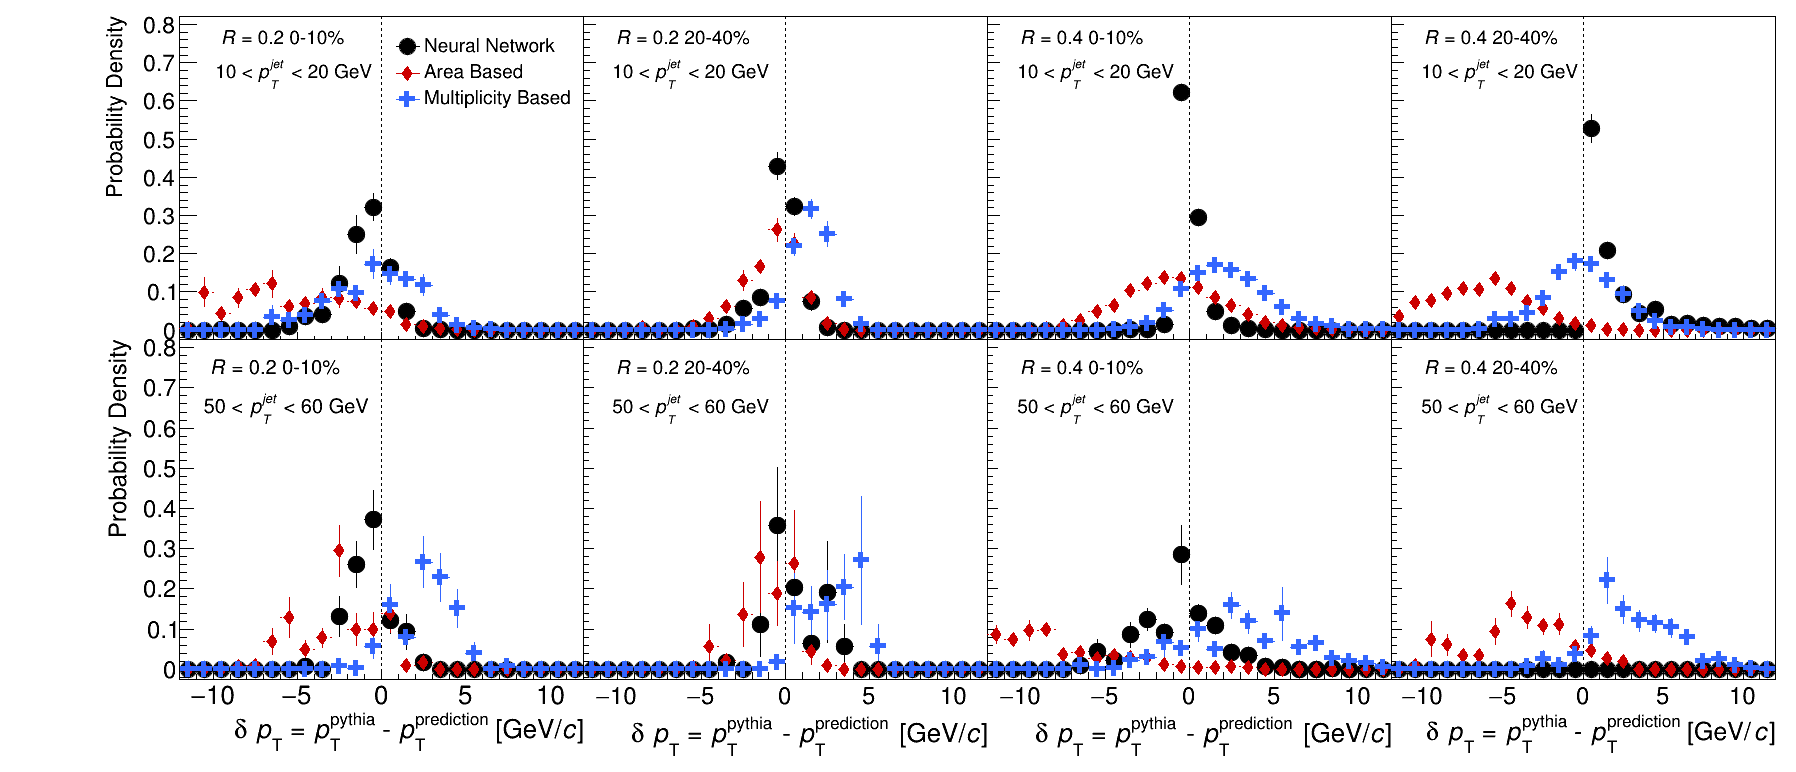

leftmargine 0.307692 bottom margin 0.214286


In [37]:
	TCanvas *c = new TCanvas("c","c",1800,800);
	gStyle->SetOptStat(0);
	c->Range(0,0,1,1);
	c->SetFillColor(0);
	c->SetBorderMode(0);
	c->SetBorderSize(0);
	c->SetFrameFillColor(0);
	c->SetFrameBorderMode(0);
	c->SetTopMargin(0.0);
	c->SetLeftMargin(0.0);
	c->SetRightMargin(0.0);
	c->SetBottomMargin(0.0);
	gROOT->SetStyle("Plain");
	float fractionYAxis =0.1;// 0.2;
	float fractionXAxis =0.12;// 0.12;
	float xwidth = (1.0-fractionYAxis)/4.0;//these are crossed because the x-axis takes up room in the y direction and vice versa
	float ywidth = (1.0-fractionXAxis)/2.0;


   gStyle->SetOptStat(0);
   gStyle->SetOptTitle(0);
   gStyle->SetLineWidth(1);
   gStyle->SetCanvasBorderMode(0);
   gStyle->SetPadBottomMargin(0.1);
   gStyle->SetPadLeftMargin(0.1);
   gStyle->SetHistLineWidth(1);
   gStyle->SetPadColor(10);
   gStyle->SetTitleSize(0.1, "xyz");
   gStyle->SetTitleOffset(1., "x");
   gStyle->SetTitleOffset(2, "y");

   TPad *part1 = new TPad("part1","part1", 0.0              ,1.0-ywidth    ,1.0-3.0*xwidth     ,1.0       ,0);
   TPad *part2 = new TPad("part2","part2", 1.0-3.0*xwidth   ,1.0-ywidth    ,1.0-2.0*xwidth     ,1.0       ,0);
   TPad *part3 = new TPad("part3","part3", 1.0-2.0*xwidth   ,1.0-ywidth    ,1.0- xwidth        ,1.0       ,0);
   TPad *part4 = new TPad("part4","part4", 1.0- xwidth      ,1.0-ywidth    ,1.0                ,1.0       ,0);

   TPad *part5 = new TPad("part1","part1", 0.0              ,0             ,1.0-3.0*xwidth     ,1.0-ywidth,0);
   TPad *part6 = new TPad("part2","part2", 1.0-3.0*xwidth   ,0             ,1.0-2.0*xwidth     ,1.0-ywidth,0);
   TPad *part7 = new TPad("part3","part3", 1.0-2.0*xwidth   ,0             ,1.0- xwidth        ,1.0-ywidth,0);
   TPad *part8 = new TPad("part4","part4", 1.0- xwidth      ,0             ,1.0        ,1.0-ywidth,0);
   
   float topmargin = 0.05;
   float rightmargin = 0.05;
   float leftmargin = fractionYAxis/(fractionYAxis+xwidth);
   float bottommargin = fractionXAxis/(fractionXAxis+ywidth);
   cout<<"leftmargine "<<leftmargin<<" bottom margin "<<bottommargin<<endl;

   part1->SetTopMargin(topmargin);
   part2->SetTopMargin(topmargin);
   part3->SetTopMargin(topmargin);
   part4->SetTopMargin(topmargin);

   part5->SetTopMargin(0.0);
   part6->SetTopMargin(0.0);
   part7->SetTopMargin(0.0);
   part8->SetTopMargin(0.0);

   
   part1->SetBottomMargin(0.0);
   part2->SetBottomMargin(0.0);
   part3->SetBottomMargin(0.0);
   part4->SetBottomMargin(0.0);

   part5->SetBottomMargin(bottommargin);
   part6->SetBottomMargin(bottommargin);
   part7->SetBottomMargin(bottommargin);
   part8->SetBottomMargin(bottommargin);

   part1->SetLeftMargin(leftmargin);
   part5->SetLeftMargin(leftmargin);
     
   part2->SetLeftMargin(0.0);
   part3->SetLeftMargin(0.0);
   part4->SetLeftMargin(0.0);
   part6->SetLeftMargin(0.0);
   part7->SetLeftMargin(0.0);
   part8->SetLeftMargin(0.0);
  
   
   part4->SetRightMargin(rightmargin);
   part8->SetRightMargin(rightmargin);
  
   
   part1->SetRightMargin(0.0);
   part2->SetRightMargin(0.0);
   part3->SetRightMargin(0.0);
   part5->SetRightMargin(0.0);
   part7->SetRightMargin(0.0);
   part6->SetRightMargin(0.0);
   
   part1->Draw();
   part2->Draw();
   part3->Draw();
   part4->Draw();
   part5->Draw();
   part6->Draw();
   part7->Draw();
   part8->Draw();
  
   part1->SetFrameFillColor(0);
   part1->SetFrameBorderMode(0);
   part1->SetBorderMode(0);
   part1->SetBorderSize(0);
   part2->SetFrameFillColor(0);
   part2->SetFrameBorderMode(0);
   part2->SetBorderMode(0);
   part2->SetBorderSize(0);
   part3->SetFrameFillColor(0);
   part3->SetFrameBorderMode(0);
   part3->SetBorderMode(0);
   part3->SetBorderSize(0);
   part4->SetFrameFillColor(0);
   part4->SetFrameBorderMode(0);
   part4->SetBorderMode(0);
   part4->SetBorderSize(0);
   part5->SetFrameFillColor(0);
   part5->SetFrameBorderMode(0);
   part5->SetBorderMode(0);
   part5->SetBorderSize(0);
   part6->SetFrameFillColor(0);
   part6->SetFrameBorderMode(0);
   part6->SetBorderMode(0);
   part6->SetBorderSize(0);
   part7->SetFrameFillColor(0);
   part7->SetFrameBorderMode(0);
   part7->SetBorderMode(0);
   part7->SetBorderSize(0);
   part8->SetFrameFillColor(0);
   part8->SetFrameBorderMode(0);
   part8->SetBorderMode(0);
   part8->SetBorderSize(0);

   TLatex * texR02_0to10 = new TLatex(0.08,0.87, Form("#it{R} = %.1f %s", jetRadiusR02, centrality1.c_str()));
   texR02_0to10->SetNDC();
   texR02_0to10->SetTextFont(42);
   texR02_0to10->SetTextSize(0.06);

   TLatex * texR04_0to10 = new TLatex(0.08,0.87, Form("#it{R} = %.1f %s", jetRadiusR04, centrality1.c_str()));
   texR04_0to10->SetNDC();
   texR04_0to10->SetTextFont(42);
   texR04_0to10->SetTextSize(0.06);

   TLatex * texR02_20to40 = new TLatex(0.08,0.87, Form("#it{R} = %.1f %s", jetRadiusR02, centrality2.c_str()));
   texR02_20to40->SetNDC();
   texR02_20to40->SetTextFont(42);
   texR02_20to40->SetTextSize(0.06);

   TLatex * texR04_20to40 = new TLatex(0.08,0.87, Form("#it{R} = %.1f %s", jetRadiusR04, centrality2.c_str()));
   texR04_20to40->SetNDC();
   texR04_20to40->SetTextFont(42);
   texR04_20to40->SetTextSize(0.06);

   TLatex * texR02_0to10_bottom = new TLatex(0.38,0.87, Form("#it{R} = %.1f %s", jetRadiusR02, centrality1.c_str()));
   texR02_0to10_bottom->SetNDC();
   texR02_0to10_bottom->SetTextFont(42);
   texR02_0to10_bottom->SetTextSize(0.06);

   TLatex * texR02_0to10_five = new TLatex(0.36,0.92, Form("#it{R} = %.1f %s", jetRadiusR02, centrality1.c_str()));
   texR02_0to10_five->SetNDC();
   texR02_0to10_five->SetTextFont(42);
   texR02_0to10_five->SetTextSize(0.05);

   TLatex * texR04_0to10_bottom = new TLatex(0.08,0.92, Form("#it{R} = %.1f %s", jetRadiusR04, centrality1.c_str()));
   texR04_0to10_bottom->SetNDC();
   texR04_0to10_bottom->SetTextFont(42);
   texR04_0to10_bottom->SetTextSize(0.05);

   TLatex * texR02_20to40_bottom = new TLatex(0.08,0.92, Form("#it{R} = %.1f %s", jetRadiusR02, centrality2.c_str()));
   texR02_20to40_bottom->SetNDC();
   texR02_20to40_bottom->SetTextFont(42);
   texR02_20to40_bottom->SetTextSize(0.05);

   TLatex * texR04_20to40_bottom = new TLatex(0.08,0.92, Form("#it{R} = %.1f %s", jetRadiusR04, centrality2.c_str()));
   texR04_20to40_bottom->SetNDC();
   texR04_20to40_bottom->SetTextFont(42);
   texR04_20to40_bottom->SetTextSize(0.05);

   TLatex * tex1_bottom = new TLatex(0.36,0.77, Form(" 10 < #it{p_{T}^{jet}} < 20 GeV"));
   tex1_bottom->SetNDC();
   tex1_bottom->SetTextFont(42);
   tex1_bottom->SetTextSize(0.06);

   TLatex * tex2_bottom = new TLatex(0.06,0.83, Form(" 50 < #it{p_{T}^{jet}} < 60 GeV"));
   tex2_bottom->SetNDC();
   tex2_bottom->SetTextFont(42);
   tex2_bottom->SetTextSize(0.05);

   TLatex * tex2_five = new TLatex(0.34,0.83, Form(" 50 < #it{p_{T}^{jet}} < 60 GeV"));
   tex2_five->SetNDC();
   tex2_five->SetTextFont(42);
   tex2_five->SetTextSize(0.05);


   TLatex * tex1 = new TLatex(0.06,0.77, Form(" 10 < #it{p_{T}^{jet}} < 20 GeV"));
   tex1->SetNDC();
   tex1->SetTextFont(42);
   tex1->SetTextSize(0.06);

   TLatex * tex2 = new TLatex(0.06,0.84, Form(" 50 < #it{p_{T}^{jet}} < 60 GeV"));
   tex2->SetNDC();
   tex2->SetTextFont(42);
   tex2->SetTextSize(0.05);


   TLatex * texA = new TLatex(0.4,0.85, Form("#it{(a)}"));
   texA->SetNDC();
   texA->SetTextFont(42);
   texA->SetTextSize(0.06);

   TLatex * texB = new TLatex(0.08,0.87, Form("#it{(b)}"));
   texB->SetNDC();
   texB->SetTextFont(42);
   texB->SetTextSize(0.06);

   TLatex * texC = new TLatex(0.08,0.87, Form("#it{(c)}"));
   texC->SetNDC();
   texC->SetTextFont(42);
   texC->SetTextSize(0.06);

   TLatex * texD = new TLatex(0.08,0.87, Form("#it{(d)}"));
   texD->SetNDC();
   texD->SetTextFont(42);
   texD->SetTextSize(0.06);

   TLatex * texE = new TLatex(0.4,0.9, Form("#it{(e)}"));
   texE->SetNDC();
   texE->SetTextFont(42);
   texE->SetTextSize(0.05);

   TLatex * texF = new TLatex(0.08,0.92, Form("#it{(f)}"));
   texF->SetNDC();
   texF->SetTextFont(42);
   texF->SetTextSize(0.05);

   TLatex * texG = new TLatex(0.08,0.92, Form("#it{(g)}"));
   texG->SetNDC();
   texG->SetTextFont(42);
   texG->SetTextSize(0.05);

   TLatex * texH = new TLatex(0.08,0.92, Form("#it{(h)}"));
   texH->SetNDC();
   texH->SetTextFont(42);
   texH->SetTextSize(0.05);



   part1->cd();
   neuralNetwork_R2_0to10->GetXaxis()->SetTitle("#delta #it{p}_{T} = #it{p}_{T}^{pythia} - #it{p}_{T}^{prediction} [GeV/#it{c}]");
   neuralNetwork_R2_0to10->GetXaxis()->SetTitleSize(0.065);
   neuralNetwork_R2_0to10->GetXaxis()->SetLabelSize(0.065);

   neuralNetwork_R2_0to10->Draw("E");
   neuralNetwork_R2_0to10->GetYaxis()->SetTitleSize(0.071);
   neuralNetwork_R2_0to10->GetYaxis()->SetLabelSize(0.075);
   neuralNetwork_R2_0to10->GetXaxis()->SetRangeUser(-12,12);
   neuralNetwork_R2_0to10->GetYaxis()->SetRangeUser(-0.025,0.82);
   neuralNetwork_R2_0to10->SetTitle("");
   areaBased_R2_0to10->Draw("E SAME");
   multiplicityBased_R2_0to10->Draw("E SAME");
   neuralNetwork_R2_0to10->Draw("HIST P SAME"); 
   areaBased_R2_0to10->Draw("HIST P SAME");
   multiplicityBased_R2_0to10->Draw("HIST P SAME");

   texR02_0to10_bottom->Draw("same");
   tex1_bottom->Draw("same");
  // texA->Draw("same");

   TLegend* leg = new TLegend(0.67, 0.67, 0.9, 0.90);
   leg->SetFillColor(0);
   leg->SetBorderSize(0);
   leg->SetTextFont(42);
   leg->SetTextSize(0.06);
   leg->Draw("SAME");
   leg->AddEntry(neuralNetwork_R4_20to40, "Neural Network");
   leg->AddEntry(areaBased_R4_20to40, "Area Based");
   leg->AddEntry(multiplicityBased_R4_20to40, "Multiplicity Based");
   
   TLine *line1 = new TLine(0,neuralNetwork_R2_0to10->GetMinimum(),0,neuralNetwork_R2_0to10->GetMaximum());
   line1->SetLineStyle(2);
   line1->Draw("same");
   


   part1->Update();
   c->Update();

   part5->cd();

   neuralNetworkhigh_R2_0to10->GetXaxis()->SetTitle("#delta #it{p}_{T} = #it{p}_{T}^{pythia} - #it{p}_{T}^{prediction} [GeV/#it{c}]");
   neuralNetworkhigh_R2_0to10->GetXaxis()->SetTitleSize(0.065);
   neuralNetworkhigh_R2_0to10->GetXaxis()->SetLabelSize(0.065);
   neuralNetworkhigh_R2_0to10->GetXaxis()->SetTitleOffset(1.15);
   neuralNetworkhigh_R2_0to10->Draw("E");
   neuralNetworkhigh_R2_0to10->GetYaxis()->SetTitleSize(0.06);
   neuralNetworkhigh_R2_0to10->GetYaxis()->SetTitleOffset(1.05);
   neuralNetworkhigh_R2_0to10->GetYaxis()->SetLabelSize(0.06);
   neuralNetworkhigh_R2_0to10->GetXaxis()->SetRangeUser(-12,12);
   neuralNetworkhigh_R2_0to10->GetYaxis()->SetRangeUser(-0.025,0.82);
   neuralNetworkhigh_R2_0to10->SetTitle("");
   neuralNetworkhigh_R2_0to10->Draw("E SAME");
   areaBasedhigh_R2_0to10->Draw("E SAME");
   multiplicityBasedhigh_R2_0to10->Draw("E SAME");
   neuralNetworkhigh_R2_0to10->Draw("HIST P SAME"); 
   areaBasedhigh_R2_0to10->Draw("HIST P SAME");
   multiplicityBasedhigh_R2_0to10->Draw("HIST P SAME");

  // texE->Draw("same");
   texR02_0to10_five->Draw("same");
   tex2_five->Draw("same");
   line1->Draw("same");

   part2->cd();

   neuralNetwork_R2_20to40->GetXaxis()->SetTitle("#delta #it{p}_{T} = #it{p}_{T}^{pythia} - #it{p}_{T}^{prediction} [GeV/#it{c}]");
   neuralNetwork_R2_20to40->GetXaxis()->SetTitleSize(0.045);
   neuralNetwork_R2_20to40->GetXaxis()->SetLabelSize(0.045);

   neuralNetwork_R2_20to40->Draw("E");
   neuralNetwork_R2_20to40->GetXaxis()->SetRangeUser(-12,12);
   neuralNetwork_R2_20to40->GetYaxis()->SetRangeUser(-0.025,0.82);
   neuralNetwork_R2_20to40->SetTitle("");
   areaBased_R2_20to40->Draw("E SAME");
   multiplicityBased_R2_20to40->Draw("E SAME");
   neuralNetwork_R2_20to40->Draw("HIST P SAME"); 
   areaBased_R2_20to40->Draw("HIST P SAME");
   multiplicityBased_R2_20to40->Draw("HIST P SAME");

  // texB->Draw("same");
   texR02_20to40->Draw("same");
   tex1->Draw("same");

   line1->Draw("same");

   part6->cd();

   neuralNetworkhigh_R2_20to40->GetXaxis()->SetTitle("#delta #it{p}_{T} = #it{p}_{T}^{pythia} - #it{p}_{T}^{prediction} [GeV/#it{c}]");
   neuralNetworkhigh_R2_20to40->GetXaxis()->SetTitleSize(0.07);
   neuralNetworkhigh_R2_20to40->GetXaxis()->SetLabelSize(0.065);
   neuralNetworkhigh_R2_20to40->GetXaxis()->SetTitleOffset(1.15);
   neuralNetworkhigh_R2_20to40->Draw("E");
   neuralNetworkhigh_R2_20to40->GetXaxis()->SetRangeUser(-12,12);
   neuralNetworkhigh_R2_20to40->GetYaxis()->SetRangeUser(-0.025,0.82);
   neuralNetworkhigh_R2_20to40->SetTitle("");
   neuralNetworkhigh_R2_20to40->Draw("E SAME");
   areaBasedhigh_R2_20to40->Draw("E SAME");
   multiplicityBasedhigh_R2_20to40->Draw("E SAME");
   neuralNetworkhigh_R2_20to40->Draw("HIST P SAME"); 
   areaBasedhigh_R2_20to40->Draw("HIST P SAME");
   multiplicityBasedhigh_R2_20to40->Draw("HIST P SAME");

   texR02_20to40_bottom->Draw("same");
   tex2_bottom->Draw("same");
   //texF->Draw("same");

   line1->Draw("same");

   part3->cd();

   neuralNetwork_R4_0to10->GetXaxis()->SetTitle("#delta #it{p}_{T} = #it{p}_{T}^{pythia} - #it{p}_{T}^{prediction} [GeV/#it{c}]");
   neuralNetwork_R4_0to10->GetXaxis()->SetTitleSize(0.045);
   neuralNetwork_R4_0to10->GetXaxis()->SetLabelSize(0.045);

   neuralNetwork_R4_0to10->Draw("E");
   neuralNetwork_R4_0to10->GetXaxis()->SetRangeUser(-12,12);
   neuralNetwork_R4_0to10->GetYaxis()->SetRangeUser(-0.025,0.82);
   neuralNetwork_R4_0to10->SetTitle("");
   areaBased_R4_0to10->Draw("E SAME");
   multiplicityBased_R4_0to10->Draw("E SAME");
   neuralNetwork_R4_0to10->Draw("HIST P SAME"); 
   areaBased_R4_0to10->Draw("HIST P SAME");
   multiplicityBased_R4_0to10->Draw("HIST P SAME");

   texR04_0to10->Draw("same");
   tex1->Draw("same");
   //texC->Draw("same");

   line1->Draw("same");


   part7->cd();

   neuralNetworkhigh_R4_0to10->GetXaxis()->SetTitle("#delta #it{p}_{T} = #it{p}_{T}^{pythia} - #it{p}_{T}^{prediction} [GeV/#it{c}]");
   neuralNetworkhigh_R4_0to10->GetXaxis()->SetTitleSize(0.07);
   neuralNetworkhigh_R4_0to10->GetXaxis()->SetLabelSize(0.065);
   neuralNetworkhigh_R4_0to10->GetXaxis()->SetTitleOffset(1.15);
   neuralNetworkhigh_R4_0to10->Draw("E");
   neuralNetworkhigh_R4_0to10->GetXaxis()->SetRangeUser(-12,12);
   neuralNetworkhigh_R4_0to10->GetYaxis()->SetRangeUser(-0.025,0.82);
   neuralNetworkhigh_R4_0to10->SetTitle("");
   neuralNetworkhigh_R4_0to10->Draw("E SAME");
   areaBasedhigh_R4_0to10->Draw("E SAME");
   multiplicityBasedhigh_R4_0to10->Draw("E SAME");
   neuralNetworkhigh_R4_0to10->Draw("HIST P SAME"); 
   areaBasedhigh_R4_0to10->Draw("HIST P SAME");
   multiplicityBasedhigh_R4_0to10->Draw("HIST P SAME");


   texR04_0to10_bottom->Draw("same");
   tex2_bottom->Draw("same");
   //texG->Draw("same");

   line1->Draw("same");

   part4->cd();

   neuralNetwork_R4_20to40->GetXaxis()->SetTitle("#delta #it{p}_{T} = #it{p}_{T}^{pythia} - #it{p}_{T}^{prediction} [GeV/#it{c}]");
   neuralNetwork_R4_20to40->GetXaxis()->SetTitleSize(0.05);
   neuralNetwork_R4_20to40->GetXaxis()->SetLabelSize(0.065);

   neuralNetwork_R4_20to40->Draw("E");
   neuralNetwork_R4_20to40->GetXaxis()->SetRangeUser(-12,12);
   neuralNetwork_R4_20to40->GetYaxis()->SetRangeUser(-0.025,0.82);
   neuralNetwork_R4_20to40->SetTitle("");
   areaBased_R4_20to40->Draw("E SAME");
   multiplicityBased_R4_20to40->Draw("E SAME");
   neuralNetwork_R4_20to40->Draw("HIST P SAME"); 
   areaBased_R4_20to40->Draw("HIST P SAME");
   multiplicityBased_R4_20to40->Draw("HIST P SAME");

   texR04_20to40->Draw("same");
   tex1->Draw("same");
  // texD->Draw("same");

  line1->Draw("same");

   part8->cd();

   neuralNetworkhigh_R4_20to40->GetXaxis()->SetTitle("#delta #it{p}_{T} = #it{p}_{T}^{pythia} - #it{p}_{T}^{prediction} [GeV/#it{c}]");
   neuralNetworkhigh_R4_20to40->GetXaxis()->SetTitleSize(0.068);
   neuralNetworkhigh_R4_20to40->GetXaxis()->SetTitleOffset(1.15);
   neuralNetworkhigh_R4_20to40->GetXaxis()->SetLabelSize(0.065);
   neuralNetworkhigh_R4_20to40->Draw("E");
   neuralNetworkhigh_R4_20to40->GetXaxis()->SetRangeUser(-12,12);
   neuralNetworkhigh_R4_20to40->GetYaxis()->SetRangeUser(-0.025,0.82);
   neuralNetworkhigh_R4_20to40->SetTitle("");

   
   texR04_20to40_bottom->Draw("same");
   tex2_bottom->Draw("same");

   line1->Draw("same");
   
  // texH->Draw("same");

   neuralNetworkhigh_R4_20to40->Draw("E SAME");
   areaBasedhigh_R4_20to40->Draw("E SAME");
   multiplicityBasedhigh_R4_20to40->Draw("E SAME");
   neuralNetworkhigh_R4_20to40->Draw("HIST P SAME"); 
   areaBasedhigh_R4_20to40->Draw("HIST P SAME");
   multiplicityBasedhigh_R4_20to40->Draw("HIST P SAME");

   c->Draw();

# Save all residaual plots into a ROOT file

In [ ]:
TFile *fout = new TFile("200AuAu_EvenSplit.root","RECREATE"); //make output files and directories
TDirectory *areadir = fout->mkdir("AreaBased_For_pythiajetpt");
TDirectory *multdir = fout->mkdir("MultiplicityBased_For_pythiajetpt");
TDirectory *neuralnetdir = fout->mkdir("NeuralNetworkBased_For_pythiajetpt");

TDirectory *areadirR2_0to10 = areadir->mkdir("TrainedOn_R2_0to10");
TDirectory *multdirR2_0to10 = multdir->mkdir("TrainedOn_R2_0to10");
TDirectory *neuralnetdirR2_0to10 = neuralnetdir->mkdir("TrainedOn_R2_0to10");

TDirectory *areadirR2_20to40 = areadir->mkdir("TrainedOn_R2_20to40");
TDirectory *multdirR2_20to40 = multdir->mkdir("TrainedOn_R2_20to40");
TDirectory *neuralnetdirR2_20to40 = neuralnetdir->mkdir("TrainedOn_R2_20to40");

TDirectory *areadirR4_0to10 = areadir->mkdir("TrainedOn_R4_0to10");
TDirectory *multdirR4_0to10 = multdir->mkdir("TrainedOn_R4_0to10");
TDirectory *neuralnetdirR4_0to10 = neuralnetdir->mkdir("TrainedOn_R4_0to10");

TDirectory *areadirR4_20to40 = areadir->mkdir("TrainedOn_R4_20to40");
TDirectory *multdirR4_20to40 = multdir->mkdir("TrainedOn_R4_20to40");
TDirectory *neuralnetdirR4_20to40 = neuralnetdir->mkdir("TrainedOn_R4_20to40");

TDirectory *R2_0to10_AreaBasedRes = areadirR2_0to10->mkdir("Inference_R2_0to10");
TDirectory *R2_0to10_MultBasedRes = multdirR2_0to10->mkdir("Inference_R2_0to10");
TDirectory *R2_0to10_NNBasedRes = neuralnetdirR2_0to10->mkdir("Inference_R2_0to10");

TDirectory *R2_20to40_AreaBasedRes = areadirR2_20to40->mkdir("Inference_R2_20to40");
TDirectory *R2_20to40_MultBasedRes = multdirR2_20to40->mkdir("Inference_R2_20to40");
TDirectory *R2_20to40_NNBasedRes = neuralnetdirR2_20to40->mkdir("Inference_R2_20to40");

TDirectory *R4_0to10_AreaBasedRes = areadirR4_0to10->mkdir("Inference_R4_0to10");
TDirectory *R4_0to10_MultBasedRes = multdirR4_0to10->mkdir("Inference_R4_0to10");
TDirectory *R4_0to10_NNBasedRes = neuralnetdirR4_0to10->mkdir("Inference_R4_0to10");

TDirectory *R4_20to40_AreaBasedRes = areadirR4_20to40->mkdir("Inference_R4_20to40");
TDirectory *R4_20to40_MultBasedRes = multdirR4_20to40->mkdir("Inference_R4_20to40");
TDirectory *R4_20to40_NNBasedRes = neuralnetdirR4_20to40->mkdir("Inference_R4_20to40");

R2_0to10_AreaBasedRes->cd();
R2_0to10_AreaRes->Write();
R2_0to10_MultBasedRes->cd();
R2_0to10_MultiplicityRes->Write();
R2_0to10_NNBasedRes->cd();
R2_0to10_NeuralNetworkRes->Write();

R2_20to40_AreaBasedRes->cd();
R2_20to40_AreaRes->Write();
R2_20to40_MultBasedRes->cd();
R2_20to40_MultiplicityRes->Write();
R2_20to40_NNBasedRes->cd();
R2_20to40_NeuralNetworkRes->Write();

R4_0to10_AreaBasedRes->cd();
R4_0to10_AreaRes->Write();
R4_0to10_MultBasedRes->cd();
R4_0to10_MultiplicityRes->Write();
R4_0to10_NNBasedRes->cd();
R4_0to10_NeuralNetworkRes->Write();

R4_20to40_AreaBasedRes->cd();
R4_20to40_AreaRes->Write();
R4_20to40_MultBasedRes->cd();
R4_20to40_MultiplicityRes->Write();
R4_20to40_NNBasedRes->cd();
R4_20to40_NeuralNetworkRes->Write();

fout->Write();
fout->Close();